In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.drop(columns="customerID",inplace=True)

In [9]:
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors="coerce")

In [14]:
df.drop(index=df[df.TotalCharges.isnull()==True].index,inplace=True)

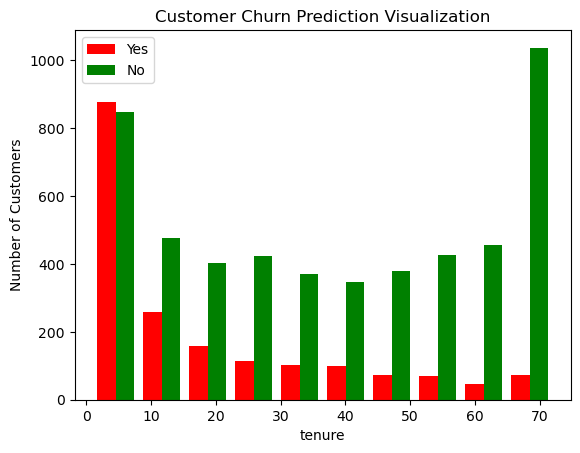

In [17]:
tenure_churn_no=df[df.Churn=="No"].tenure
tenure_churn_yes=df[df.Churn=="Yes"].tenure
plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([tenure_churn_yes,tenure_churn_no],color=["red","green"],label=["Yes","No"])
plt.legend()
plt.show()

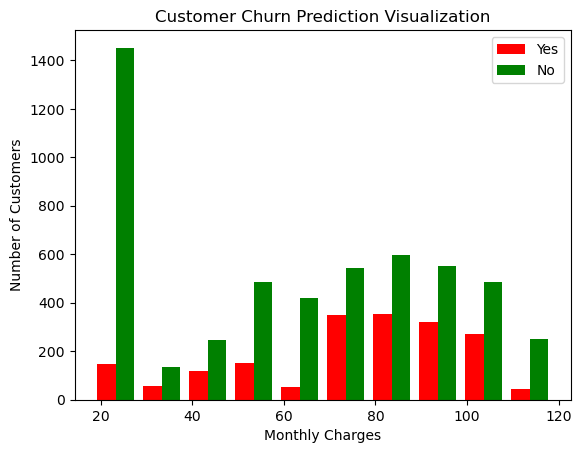

In [18]:
mc_churn_no=df[df.Churn=="No"].MonthlyCharges
mc_churn_yes=df[df.Churn=="Yes"].MonthlyCharges
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([mc_churn_yes,mc_churn_no],color=["red","green"],label=["Yes","No"])
plt.legend()
plt.show()

In [23]:
def print_uni(df):
    for i in df:
        if(df[i].dtypes=="object"):
            print(f"{i}:{df[i].unique()}")
print_uni(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [27]:
df.replace("No internet service","No",inplace=True)
df.replace("No phone service","No",inplace=True)

In [29]:
liste=[]
yes_no=["Yes","No"]
for i in df:
    if all(k in yes_no for k in df[i].unique()):
        liste.append(i)
for col in liste:
    df[col].replace({"Yes":1,"No":0},inplace=True)

In [31]:
for i in df:
    print(f"{i}:{df[i].unique()}")

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [32]:
df["gender"].replace({"Male":1,"Female":0},inplace=True)

In [33]:
df2=pd.get_dummies(data=df,columns=["InternetService","Contract","PaymentMethod"])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [35]:
df2.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1498,1,1,0,0,15,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4640,1,0,1,1,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3231,0,0,0,0,15,1,0,1,1,1,...,1,0,0,1,0,0,0,0,0,1
4031,0,0,1,0,72,1,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
1860,1,0,1,1,71,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3702,0,1,0,0,20,1,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
6757,1,0,1,1,51,0,0,1,1,1,...,1,0,0,0,1,0,0,0,1,0
1715,0,0,1,1,46,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2785,0,0,0,0,25,1,1,0,1,1,...,0,1,0,0,0,1,0,0,1,0
6698,1,0,0,0,40,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [36]:
col_scale=["tenure","MonthlyCharges","TotalCharges"]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[col_scale]=scaler.fit_transform(df2[col_scale])
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1447,1,0,0,1,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2803,0,0,0,0,0.591549,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2085,0,1,1,0,0.436620,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
6841,1,0,0,0,0.056338,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1


In [37]:
X=df2.drop(columns="Churn")
y=df2["Churn"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation="relu"),
    keras.layers.Dense(15,activation="tanh"),
    keras.layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])
model.fit(X_train,y_train,epochs=100)
                

Epoch 1/100
176/176 [==============================] - 0s 816us/step - loss: 0.4988 - accuracy: 0.7584
Epoch 2/100
176/176 [==============================] - 0s 708us/step - loss: 0.4274 - accuracy: 0.7975
Epoch 3/100
176/176 [==============================] - 0s 690us/step - loss: 0.4198 - accuracy: 0.8023
Epoch 4/100
176/176 [==============================] - 0s 684us/step - loss: 0.4161 - accuracy: 0.8048
Epoch 5/100
176/176 [==============================] - 0s 698us/step - loss: 0.4140 - accuracy: 0.8037
Epoch 6/100
176/176 [==============================] - 0s 704us/step - loss: 0.4126 - accuracy: 0.8066
Epoch 7/100
176/176 [==============================] - 0s 745us/step - loss: 0.4110 - accuracy: 0.8053
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8048
Epoch 9/100
176/176 [==============================] - 0s 822us/step - loss: 0.4083 - accuracy: 0.8057
Epoch 10/100
176/176 [==============================] - 0s 861us/step - los

Epoch 80/100
176/176 [==============================] - 0s 804us/step - loss: 0.3726 - accuracy: 0.8256
Epoch 81/100
176/176 [==============================] - 0s 909us/step - loss: 0.3714 - accuracy: 0.8235
Epoch 82/100
176/176 [==============================] - 0s 908us/step - loss: 0.3712 - accuracy: 0.8256
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3721 - accuracy: 0.8258
Epoch 84/100
176/176 [==============================] - 0s 955us/step - loss: 0.3715 - accuracy: 0.8220
Epoch 85/100
176/176 [==============================] - 0s 832us/step - loss: 0.3713 - accuracy: 0.8268
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3711 - accuracy: 0.8274
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3700 - accuracy: 0.8272
Epoch 88/100
176/176 [==============================] - 0s 958us/step - loss: 0.3707 - accuracy: 0.8276
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - 

In [40]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 718us/step - loss: 0.4846 - accuracy: 0.7754


[0.4846222996711731, 0.7754086852073669]

In [41]:
yp=model.predict(X_test)
yp[:3]

44/44 [==============================] - 0s 601us/step


array([[1.7256811e-04],
       [8.3820954e-02],
       [6.0186774e-01]], dtype=float32)

In [42]:
y_pred=[]
for el in yp:
    if el>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
y_pred[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.60      0.45      0.52       374

    accuracy                           0.78      1407
   macro avg       0.71      0.67      0.69      1407
weighted avg       0.76      0.78      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

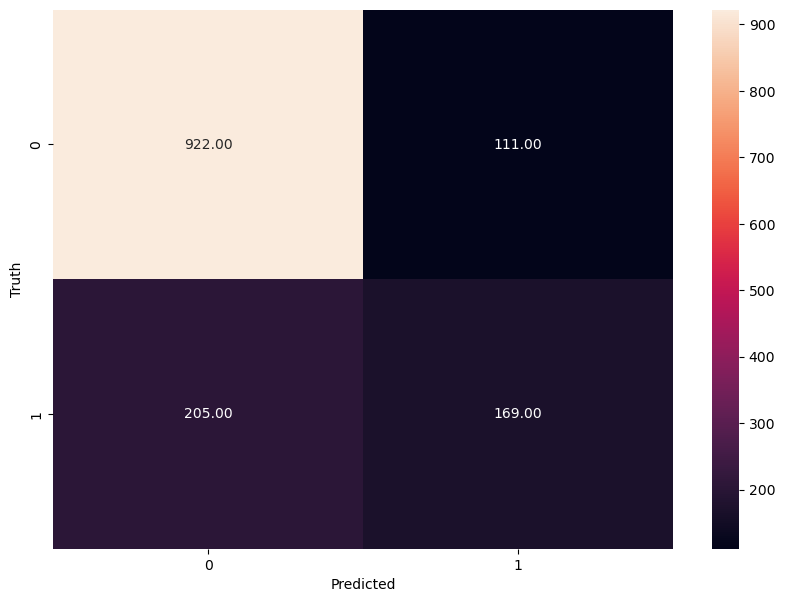

In [45]:
import seaborn as sns
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt=".2f")
plt.xlabel("Predicted")
plt.ylabel("Truth")